In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
df = pd.read_csv('summer-products-with-rating-and-performance_2020-08.csv')

In [3]:
df_cln = pd.read_csv('df_clean.csv')

## __3. Splitting ke Train Test set__

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from math import sqrt
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn import metrics

from sklearn.feature_selection import SelectPercentile
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error



In [5]:
df_mod = df_cln.copy()

In [6]:
df_fix = df_mod[['price','uses_ad_boosts','retail_price','rating_count','rating','badge_local_product','badge_product_quality','badge_fast_shipping','merchant_rating_count','merchant_rating','units_sold']]

In [7]:
df_fix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1514 entries, 0 to 1513
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price                  1514 non-null   float64
 1   uses_ad_boosts         1514 non-null   int64  
 2   retail_price           1514 non-null   int64  
 3   rating_count           1514 non-null   int64  
 4   rating                 1514 non-null   float64
 5   badge_local_product    1514 non-null   int64  
 6   badge_product_quality  1514 non-null   int64  
 7   badge_fast_shipping    1514 non-null   int64  
 8   merchant_rating_count  1514 non-null   int64  
 9   merchant_rating        1514 non-null   float64
 10  units_sold             1514 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 130.2 KB


### Target

In [8]:
df_fix['units_sold']

0         100
1       20000
2         100
3        5000
4         100
        ...  
1509    10000
1510      100
1511      100
1512      100
1513      100
Name: units_sold, Length: 1514, dtype: int64

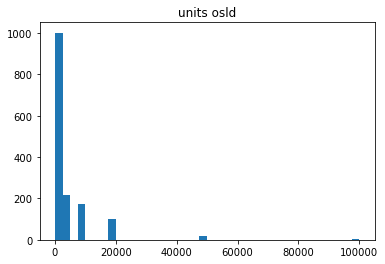

In [9]:
plt.hist(df_cln['units_sold'], bins=40)
plt.title('units osld')
plt.show()

C:\Users\BUDI PRIGUNANDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


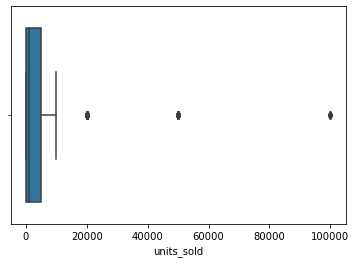

In [10]:
sns.boxplot(df_fix['units_sold'])
plt.show()

<ipython-input-11-9a0a85cfed2f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fix['log_units_sold'] = np.log1p(df_fix['units_sold'])


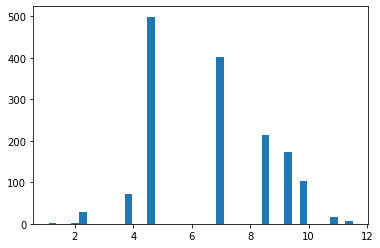

In [11]:
df_fix['log_units_sold'] = np.log1p(df_fix['units_sold'])
plt.hist(df_fix['log_units_sold'], bins=40)
plt.show()

C:\Users\BUDI PRIGUNANDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


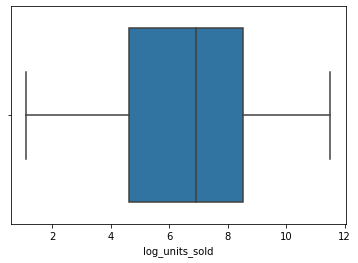

In [12]:
sns.boxplot(df_fix['log_units_sold'])
plt.show()

In [13]:
df_fix.drop('units_sold',axis = 1, inplace=True)

C:\Users\BUDI PRIGUNANDA\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [14]:
df_fix

,price,uses_ad_boosts,retail_price,rating_count,rating,badge_local_product,badge_product_quality,badge_fast_shipping,merchant_rating_count,merchant_rating,log_units_sold
0,16.00,0,14,54,3.76,0,0,0,568,4.128521,4.615121
1,8.00,1,22,6135,3.45,0,0,0,17752,3.899673,9.903538
2,8.00,0,43,14,3.57,0,0,0,295,3.989831,4.615121
3,8.00,1,8,579,4.03,0,0,0,23832,4.020435,8.517393
4,2.72,1,3,20,3.10,0,0,0,14482,4.001588,4.615121
...,...,...,...,...,...,...,...,...,...,...,...
1509,6.00,1,9,1367,4.08,0,0,0,5316,4.224605,9.210440
1510,2.00,1,56,28,3.07,0,0,0,4435,3.696054,4.615121
1511,5.00,0,19,59,3.71,0,0,0,210,3.961905,4.615121
1512,13.00,0,11,2,2.50,0,0,0,31,3.774194,4.615121


In [15]:
X = df_fix.drop(columns='log_units_sold')
y = df_fix['log_units_sold']

In [16]:
# X = df_fix.drop('log_units_sold',axis = 1)
# y = df_fix['units_sold']

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

### __4. Membuat Model__

#### RandomForest

In [18]:
df_fix.columns

Index(['price', 'uses_ad_boosts', 'retail_price', 'rating_count', 'rating',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'merchant_rating_count', 'merchant_rating', 'log_units_sold'],
      dtype='object')

In [19]:
model_1 = RandomForestRegressor(n_estimators = 1000,random_state = 42)
model_1.fit(X_train,y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [20]:
model_1.score(X_test,y_test)

0.8970931127182838

#### LinearRegression

In [21]:
model_2 = LinearRegression()
model_2.fit(X_train,y_train)

LinearRegression()

In [22]:
model_2.score(X_test,y_test)

0.41948154511989433

In [23]:
model_2.score(X_test,y_test)

0.41948154511989433

In [24]:
scores = pd.DataFrame({'RandomForest': model_1.score(X_test,y_test),
                       'LinearRegression': model_2.score(X_test,y_test)},
                        index = [0])

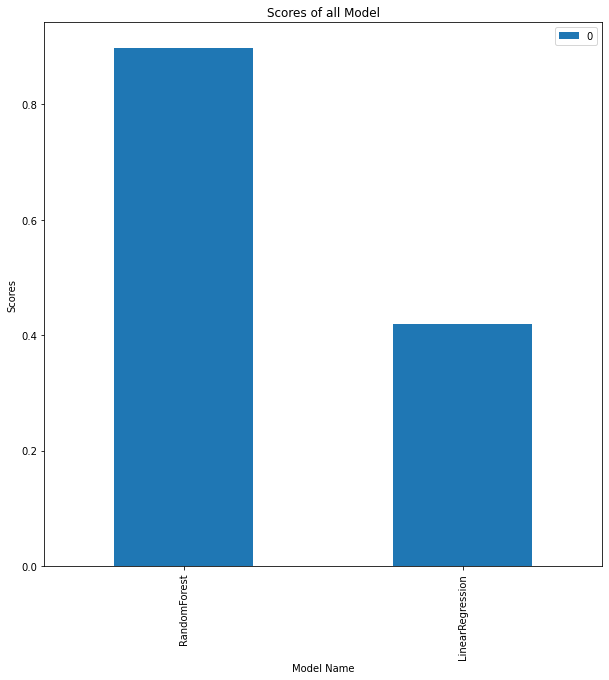

In [25]:
scores.T.plot(kind = 'bar',
              figsize = (10,10))
plt.title('Scores of all Model')
plt.xlabel('Model Name')
plt.ylabel('Scores');

In [26]:
import joblib

In [27]:
joblib.dump(model_1,'best_model_fin_pro')

['best_model_fin_pro']

In [28]:
X

,price,uses_ad_boosts,retail_price,rating_count,rating,badge_local_product,badge_product_quality,badge_fast_shipping,merchant_rating_count,merchant_rating
0,16.00,0,14,54,3.76,0,0,0,568,4.128521
1,8.00,1,22,6135,3.45,0,0,0,17752,3.899673
2,8.00,0,43,14,3.57,0,0,0,295,3.989831
3,8.00,1,8,579,4.03,0,0,0,23832,4.020435
4,2.72,1,3,20,3.10,0,0,0,14482,4.001588
...,...,...,...,...,...,...,...,...,...,...
1509,6.00,1,9,1367,4.08,0,0,0,5316,4.224605
1510,2.00,1,56,28,3.07,0,0,0,4435,3.696054
1511,5.00,0,19,59,3.71,0,0,0,210,3.961905
1512,13.00,0,11,2,2.50,0,0,0,31,3.774194


In [29]:
X_train

,price,uses_ad_boosts,retail_price,rating_count,rating,badge_local_product,badge_product_quality,badge_fast_shipping,merchant_rating_count,merchant_rating
869,11.00,1,11,1401,4.16,0,0,0,13879,4.054471
1279,19.00,1,17,61,4.33,0,0,0,487,4.234086
1333,14.00,1,139,2107,4.26,0,1,0,20387,4.193457
601,8.00,0,85,2,3.50,0,0,0,59234,3.987051
590,8.00,0,7,1649,3.28,0,0,0,6818,3.982400
...,...,...,...,...,...,...,...,...,...,...
1130,11.00,1,26,1,5.00,0,0,0,8685,4.140702
1294,2.00,0,2,5,4.80,0,0,0,42,3.666667
860,8.00,0,54,14568,3.69,0,0,0,78307,3.840257
1459,8.00,0,10,6,3.50,0,0,0,117,3.786325


In [30]:
X.describe()

,price,uses_ad_boosts,retail_price,rating_count,rating,badge_local_product,badge_product_quality,badge_fast_shipping,merchant_rating_count,merchant_rating
count,1514.000000,1514.000000,1514.000000,1514.000000,1514.000000,1514.000000,1514.000000,1514.000000,1.514000e+03,1514.000000
mean,8.340667,0.433289,23.384412,911.297226,3.783917,0.017834,0.075297,0.013210,2.597702e+04,4.030857
std,3.917279,0.495693,30.673906,2007.934924,0.481118,0.132390,0.263958,0.114211,7.639055e+04,0.197419
min,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3.000000e+00,2.941176
25%,5.840000,0.000000,7.000000,27.000000,3.530000,0.000000,0.000000,0.000000,2.087000e+03,3.917377
50%,8.000000,0.000000,10.000000,164.000000,3.830000,0.000000,0.000000,0.000000,8.191000e+03,4.040575
75%,11.000000,1.000000,26.000000,874.500000,4.087500,0.000000,0.000000,0.000000,2.456400e+04,4.157631
max,49.000000,1.000000,252.000000,20744.000000,5.000000,1.000000,1.000000,1.000000,2.174765e+06,4.577519


In [31]:
a = float(input('price ? '))
b = int(input('uses_ad_boosts ? '))
c = int(input('retail_price ? '))
d = int(input('rating_count ? '))
e = float(input('rating ? '))
f = int(input('badge_local_product ? '))
g = int(input('badge_product_quality ? '))
h = int(input('badge_fast_shipping ? '))
i = int(input('merchant_rating_count ? '))
j = float(input('merchant_rating ? '))

# price ?  12
# uses_ad_boosts ?  1
# retail_price ?  200
# rating_count ?  10000
# rating ?  5
# badge_local_product ?  1
# badge_product_quality ?  1
# badge_fast_shipping ?  1
# merchant_rating_count ?  100000
# merchant_rating ?  4


df = pd.DataFrame([[a,b,c,d,e,f,g,h,i,j]],columns = X_test.columns)
df

price ?  12
uses_ad_boosts ?  1
retail_price ?  200
rating_count ?  10000
rating ?  5
badge_local_product ?  1
badge_product_quality ?  1
badge_fast_shipping ?  1
merchant_rating_count ?  100000
merchant_rating ?  4


,price,uses_ad_boosts,retail_price,rating_count,rating,badge_local_product,badge_product_quality,badge_fast_shipping,merchant_rating_count,merchant_rating
0,12.0,1,200,10000,5.0,1,1,1,100000,4.0


In [36]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1514 entries, 0 to 1513
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price                  1514 non-null   float64
 1   uses_ad_boosts         1514 non-null   int64  
 2   retail_price           1514 non-null   int64  
 3   rating_count           1514 non-null   int64  
 4   rating                 1514 non-null   float64
 5   badge_local_product    1514 non-null   int64  
 6   badge_product_quality  1514 non-null   int64  
 7   badge_fast_shipping    1514 non-null   int64  
 8   merchant_rating_count  1514 non-null   int64  
 9   merchant_rating        1514 non-null   float64
dtypes: float64(3), int64(7)
memory usage: 118.4 KB


In [37]:
hh = model_1.predict(df)

In [38]:
print("Your expected Price Unit Sold is",(np.expm1(hh)[0]).round(2))


Your expected Price Unit Sold is 34284.57


C:\Users\BUDI PRIGUNANDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


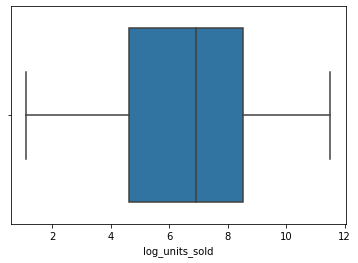

In [40]:
sns.boxplot(df_fix['log_units_sold'])
plt.show()